1. Идея
корреляция между продажами и результатами. Если все верно время презентации больше 20 секунд , тогда мы сравниваем человеческий KPI.
1) подсчитать корреляцию
1.1 удалить нан
2)человек- подсчет сколько у него продаж качественных.
3) создать скрипт, вбиваем имя человека, ищутся все его заказы, из них вычитаются "сфабрикованные" из чистых заказов получаем его kpi.
2. Использовать долготу и широту( если данные совпадают)
3. Написать код, если человек получил все заказы на одной долготе и широте- увольнение


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pharma=pd.read_excel('/content/pharma xlsx.xlsx')


KeyboardInterrupt: ignored

In [ ]:
print(pharma.head(5))
pharma.info()
pharma.describe()


   ActivityID_CRM EventType_CRM  ...  Accuracy        LocationTime
0         5365971         Визит  ...    16.374 2019-12-04 14:09:22
1         5365979         Визит  ...    16.648 2019-12-04 09:48:20
2         5365981         Визит  ...    17.080 2019-12-05 17:11:24
3         5365981         Визит  ...    17.080 2019-12-05 17:11:24
4         5365981         Визит  ...    17.080 2019-12-05 17:11:24

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525965 entries, 0 to 525964
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ActivityID_CRM         525965 non-null  int64         
 1   EventType_CRM          525965 non-null  object        
 2   VisitNumberClient_CRM  469783 non-null  float64       
 3   StartTime_CRM          525965 non-null  datetime64[ns]
 4   EndTime_CRM            525965 non-null  datetime64[ns]
 5   UniqueId_CRM           525937 non-null 

,ActivityID_CRM,VisitNumberClient_CRM,SLM_AgentId_CRM,FLM_AgentId_CRM,MR_AgentId_CRM,CompanyID_CRM,ClientID_CRM,PersonID_CRM,TargetGroupAddon_CRM,IsCompleted,IsDoubleCall,BrandId_CLM,BrandDuration_CLM,BrandResult_CRM,Latitude,Longitude,Accuracy
count,5.259650e+05,469783.000000,525876.000000,525876.000000,525965.000000,5.214000e+05,5.214000e+05,5.214000e+05,0.0,525965.000000,525937.000000,507139.000000,507139.000000,344805.000000,499013.000000,499013.000000,499013.000000
mean,5.709297e+06,1.014124,968.554486,1517.520471,1990.151854,1.395634e+05,1.101914e+06,1.688442e+06,NaN,0.983356,0.034932,45.129775,132.639308,17.740537,54.021393,50.237199,77.160473
std,5.488380e+04,0.466496,1268.205452,1495.994526,1525.434441,1.906882e+05,8.405887e+05,1.465199e+06,NaN,0.127932,0.183608,11.306829,261.711278,25.647889,5.639421,23.893974,2768.704474
min,4.426504e+06,1.000000,15.000000,3.000000,4.000000,3.000000e+00,8.000000e+00,7.000000e+00,NaN,0.000000,0.000000,29.000000,0.000000,-139.000000,0.000000,0.000000,0.000000
25%,5.673482e+06,1.000000,221.000000,247.000000,347.000000,2.898200e+04,1.756320e+05,1.300390e+05,NaN,1.000000,0.000000,35.000000,4.000000,3.000000,52.264800,37.533000,12.000000
50%,5.713573e+06,1.000000,420.000000,443.000000,3010.000000,5.781300e+04,1.154857e+06,2.185345e+06,NaN,1.000000,0.000000,46.000000,33.000000,9.000000,55.504400,39.873400,23.989000
75%,5.750097e+06,1.000000,548.000000,3263.000000,3430.000000,1.434960e+05,1.949313e+06,3.207904e+06,NaN,1.000000,0.000000,57.000000,147.000000,22.000000,56.317600,55.880300,32.303000
max,5.886067e+06,149.000000,3586.000000,3705.000000,3696.000000,1.012958e+06,2.433352e+06,3.686617e+06,NaN,1.000000,1.000000,69.000000,38879.000000,2515.000000,69.078340,142.755100,870489.375000


**первые строчки и анализ данных.Здесь мы видим основные моменты.** 




```
# This is formatted as code
```




In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
pharma['EventType_CRM'].value_counts()

Визит                                      469783
Фармкружок                                  38363
Видеопрезентация                             8164
Презентация                                  5111
Административная работа                      1351
Время в дороге                                730
Отпуск                                        553
Обед                                          448
Встреча с менеджером                          361
Тренинг                                       335
Круглый стол                                  174
Ремонт автомобиля                             147
Болезнь                                       145
Подготовка презентации / круглого стола        67
Выставка / конгресс                            63
Встреча с Opinion Leader                       49
Проектная деятельность                         45
Встреча с клиентом                             27
Видеоконференция                               17
Подготовка выставки / конгресса                16


In [ ]:
pharma.head(10)

,ActivityID_CRM,EventType_CRM,VisitNumberClient_CRM,StartTime_CRM,EndTime_CRM,UniqueId_CRM,BusinessUnit_CRM,Team_CRM,SLM_AgentId_CRM,FLM_AgentId_CRM,MR_AgentId_CRM,CompanyID_CRM,ClientID_CRM,PersonID_CRM,Speciality_CRM,TargetGroup_CRM,TargetGroupAddon_CRM,Category_CRM,CompanyType_CRM,IsCompleted,IsDoubleCall,BrandId_CLM,BrandName_CLM,BrandDuration_CLM,BrandResult_CRM,Latitude,Longitude,Accuracy,LocationTime
0,5365971,Визит,1.0,2019-12-04 14:00:00,2019-12-04 14:10:00,ACT-c6cb9b19-bdc2-4b7e-b6fc-375a1784f874,OTC,OTC-1,3586.0,139.0,146,49996.0,58769.0,72686.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,0.0,65.0,Фемибион 2,61.0,10.0,52.2644,104.3125,16.374,2019-12-04 14:09:22
1,5365979,Визит,1.0,2019-12-04 09:30:00,2019-12-04 09:40:00,ACT-50551d82-5928-4d96-8c96-d82e6bea064a,OTC,OTC-1,3586.0,139.0,146,15293.0,90742.0,113187.0,Оториноларингология,ЛОР-врачи,NaN,A,Поликлиника,1,0.0,53.0,Аллервэй,102.0,6.0,52.2643,104.3124,16.648,2019-12-04 09:48:20
2,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,37.0,Фемибион,25.0,NaN,52.2573,104.3444,17.080,2019-12-05 17:11:24
3,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,64.0,Фемибион 1,25.0,8.0,52.2573,104.3444,17.080,2019-12-05 17:11:24
4,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,37.0,Фемибион,96.0,NaN,52.2573,104.3444,17.080,2019-12-05 17:11:24
5,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,64.0,Фемибион 1,96.0,8.0,52.2573,104.3444,17.080,2019-12-05 17:11:24
6,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,37.0,Фемибион,46.0,NaN,52.2573,104.3444,17.080,2019-12-05 17:11:24
7,5365991,Визит,1.0,2019-12-04 12:00:00,2019-12-04 12:10:00,ACT-7fe23bac-dbc5-4a76-a52c-18f5b3cc3983,OTC,OTC-1,3586.0,139.0,146,49996.0,45407.0,56401.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,0.0,64.0,Фемибион 1,2.0,16.0,52.2640,104.3126,37.044,2019-12-04 12:04:43
8,5366005,Визит,1.0,2019-12-18 13:00:00,2019-12-18 13:10:00,ACT-686d3617-d8c5-4667-93c1-482730e0745c,OTC,OTC-1,3586.0,139.0,146,49996.0,45407.0,56401.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,0.0,36.0,Нормазе,33.0,5.0,52.2641,104.3126,132.571,2019-12-18 13:10:13
9,5366009,Визит,1.0,2019-12-04 09:00:00,2019-12-04 09:10:00,ACT-e209db1f-c150-4034-90e4-045b6ff2e187,OTC,OTC-1,3586.0,139.0,146,18453.0,196524.0,185913.0,Дерматология,Дерматологи,NaN,A,Поликлиника,1,0.0,35.0,Цетрин,4.0,12.0,52.2662,104.3113,16.782,2019-12-04 08:39:58


In [ ]:
pharma['VisitNumberClient_CRM'].value_counts()

1.0      464906
2.0        4350
3.0         331
4.0         135
5.0          23
6.0           6
11.0          6
9.0           6
7.0           5
20.0          5
100.0         1
98.0          1
22.0          1
77.0          1
106.0         1
62.0          1
14.0          1
149.0         1
132.0         1
113.0         1
Name: VisitNumberClient_CRM, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.69769e+05, 6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <a list of 10 Patch objects>)

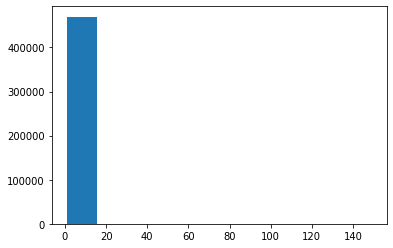

In [ ]:
plt.hist(pharma['VisitNumberClient_CRM'])

In [ ]:
pharma['SLM_AgentId_CRM'].value_counts()




Найз                 63875
Омез                 51049
Цетрин               34083
Ибуклин              33493
Називин              33279
Нейробион            27379
Кеторол экспресс     27261
Кеторол              27250
Омез ДСР             25773
РАЗО                 20842
Тексаред             20334
Фемибион             19138
Найз гель            18831
Нормазе              15607
Ибуклин Юниор        12671
Леволет Р            11529
Леволет              11527
Фемибион 1            9962
Фемибион 2            9176
Ципролет              8698
Найзилат              7949
Аллервэй              6158
Ципролет А            5433
Декспан Плюс          3505
Экзифин               2223
Декспан Плюс Бэби      114
Name: BrandName_CLM, dtype: int64

In [ ]:
pharma.columns.tolist()

['ActivityID_CRM',
 'EventType_CRM',
 'VisitNumberClient_CRM',
 'StartTime_CRM',
 'EndTime_CRM',
 'UniqueId_CRM',
 'BusinessUnit_CRM',
 'Team_CRM',
 'SLM_AgentId_CRM',
 'FLM_AgentId_CRM',
 'MR_AgentId_CRM',
 'CompanyID_CRM',
 'ClientID_CRM',
 'PersonID_CRM',
 'Speciality_CRM',
 'TargetGroup_CRM',
 'TargetGroupAddon_CRM',
 'Category_CRM',
 'CompanyType_CRM',
 'IsCompleted',
 'IsDoubleCall',
 'BrandId_CLM',
 'BrandName_CLM',
 'BrandDuration_CLM',
 'BrandResult_CRM',
 'Latitude',
 'Longitude',
 'Accuracy',
 'LocationTime']

In [ ]:
f=[pharma['BrandName_CLM'].value_counts()]


In [ ]:
list(f)

[Найз                 63875
 Омез                 51049
 Цетрин               34083
 Ибуклин              33493
 Називин              33279
 Нейробион            27379
 Кеторол экспресс     27261
 Кеторол              27250
 Омез ДСР             25773
 РАЗО                 20842
 Тексаред             20334
 Фемибион             19138
 Найз гель            18831
 Нормазе              15607
 Ибуклин Юниор        12671
 Леволет Р            11529
 Леволет              11527
 Фемибион 1            9962
 Фемибион 2            9176
 Ципролет              8698
 Найзилат              7949
 Аллервэй              6158
 Ципролет А            5433
 Декспан Плюс          3505
 Экзифин               2223
 Декспан Плюс Бэби      114
 Name: BrandName_CLM, dtype: int64]

In [ ]:
f[1]

IndexError: ignored

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([234557.,   5711.,      0.,      0.,      0.,  22904.,  33091.,
         18169., 191595.,  15373.]),
 array([7.000000e+00, 3.686680e+05, 7.373290e+05, 1.105990e+06,
        1.474651e+06, 1.843312e+06, 2.211973e+06, 2.580634e+06,
        2.949295e+06, 3.317956e+06, 3.686617e+06]),
 <a list of 10 Patch objects>)

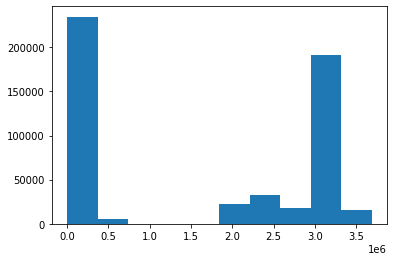

In [ ]:
plt.hist(pharma['PersonID_CRM'])

In [ ]:
f# нужно сделать гистограмму!!!!

[Найз                 63875
 Омез                 51049
 Цетрин               34083
 Ибуклин              33493
 Називин              33279
 Нейробион            27379
 Кеторол экспресс     27261
 Кеторол              27250
 Омез ДСР             25773
 РАЗО                 20842
 Тексаред             20334
 Фемибион             19138
 Найз гель            18831
 Нормазе              15607
 Ибуклин Юниор        12671
 Леволет Р            11529
 Леволет              11527
 Фемибион 1            9962
 Фемибион 2            9176
 Ципролет              8698
 Найзилат              7949
 Аллервэй              6158
 Ципролет А            5433
 Декспан Плюс          3505
 Экзифин               2223
 Декспан Плюс Бэби      114
 Name: BrandName_CLM, dtype: int64]

In [ ]:
pharma['PersonID_CRM'].value_counts()# сделать подсчет КПИА с помощью создания таблицы

3203660.0    68
3220504.0    61
2033699.0    60
3192999.0    59
3191636.0    57
             ..
3199199.0     1
18523.0       1
74124.0       1
296633.0      1
77803.0       1
Name: PersonID_CRM, Length: 71989, dtype: int64

In [ ]:
pharma['BrandResult_CRM'].value_counts()

1.0      43632
5.0      29665
2.0      25592
20.0     20559
4.0      17347
         ...  
233.0        1
484.0        1
622.0        1
239.0        1
680.0        1
Name: BrandResult_CRM, Length: 292, dtype: int64

In [ ]:
pharma['BrandDuration_CLM'].value_counts()#время презентации в секундах

2.0       39535
1.0       39514
3.0       26484
4.0       16723
5.0       12338
          ...  
1761.0        1
1758.0        1
1757.0        1
6000.0        1
3724.0        1
Name: BrandDuration_CLM, Length: 2171, dtype: int64

In [ ]:
pharma['BrandDuration_CLM'].head(5) 

In [ ]:
df = pd.DataFrame(data,columns=['A','B','C'])

In [ ]:
np.corrcoef(pharma['BrandDuration_CLM'],pharma['BrandResult_CRM'])#подсчитать корреляцию

array([[nan, nan],
       [nan, nan]])

In [ ]:
time=pharma['BrandDuration_CLM']
sells=pharma['BrandResult_CRM']

In [ ]:
type(time)

pandas.core.series.Series

In [ ]:
type(sells)

pandas.core.series.Series

In [ ]:
time.head(5)

0     61.0
1    102.0
2     25.0
3     25.0
4     96.0
Name: BrandDuration_CLM, dtype: float64

In [ ]:
time.head(60)

0      61.0
1     102.0
2      25.0
3      25.0
4      96.0
5      96.0
6      46.0
7       2.0
8      33.0
9       4.0
10    101.0
11      3.0
12      1.0
13    450.0
14    450.0
15    450.0
16    450.0
17    450.0
18    450.0
19    450.0
20     56.0
21     56.0
22     56.0
23     56.0
24     56.0
25     56.0
26     56.0
27    107.0
28      5.0
29      5.0
30      3.0
31      3.0
32     33.0
33      6.0
34     51.0
35     23.0
36     28.0
37     65.0
38     16.0
39     70.0
40     53.0
41     32.0
42     77.0
43     31.0
44    177.0
45     99.0
46      7.0
47     12.0
48     88.0
49    151.0
50     94.0
51      2.0
52     62.0
53     54.0
54     25.0
55      2.0
56      2.0
57     60.0
58    261.0
59     23.0
Name: BrandDuration_CLM, dtype: float64

In [ ]:
np.corrcoef(time,sells)

array([[nan, nan],
       [nan, nan]])

In [ ]:
#найти нан , очистить , наблюдать кореляцию

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: BrandDuration_CLM, dtype: float64)

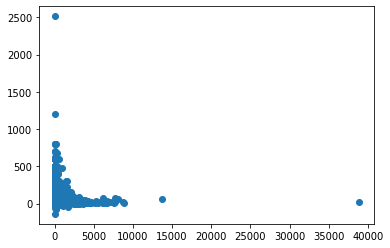

In [ ]:
plt.scatter(time,sells)

0          61.0
1         102.0
2          25.0
3          25.0
4          96.0
          ...  
525960     14.0
525961     14.0
525962     14.0
525963     14.0
525964     14.0
Name: BrandDuration_CLM, Length: 525965, dtype: float64

In [ ]:
sells.dropna()

0         10.0
1          6.0
3          8.0
5          8.0
7         16.0
          ... 
525948    20.0
525949     4.0
525950    20.0
525953     8.0
525955     5.0
Name: BrandResult_CRM, Length: 344805, dtype: float64

In [ ]:
sells=sells.fillna(0)

AttributeError: ignored

In [ ]:
time=time.fillna(0)

AttributeError: ignored

In [ ]:
np.corrcoef(time,sells)

TypeError: ignored

In [ ]:
sells.fillna(0,inplace=True)#заполнить наны и посчитать корреляцию

AttributeError: ignored

In [ ]:
plt.hist(pharma)

In [ ]:
pharma.head(3)

,ActivityID_CRM,EventType_CRM,VisitNumberClient_CRM,StartTime_CRM,EndTime_CRM,UniqueId_CRM,BusinessUnit_CRM,Team_CRM,SLM_AgentId_CRM,FLM_AgentId_CRM,MR_AgentId_CRM,CompanyID_CRM,ClientID_CRM,PersonID_CRM,Speciality_CRM,TargetGroup_CRM,TargetGroupAddon_CRM,Category_CRM,CompanyType_CRM,IsCompleted,IsDoubleCall,BrandId_CLM,BrandName_CLM,BrandDuration_CLM,BrandResult_CRM,Latitude,Longitude,Accuracy,LocationTime
0,5365971,Визит,1.0,2019-12-04 14:00:00,2019-12-04 14:10:00,ACT-c6cb9b19-bdc2-4b7e-b6fc-375a1784f874,OTC,OTC-1,3586.0,139.0,146,49996.0,58769.0,72686.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,0.0,65.0,Фемибион 2,61.0,10.0,52.2644,104.3125,16.374,2019-12-04 14:09:22
1,5365979,Визит,1.0,2019-12-04 09:30:00,2019-12-04 09:40:00,ACT-50551d82-5928-4d96-8c96-d82e6bea064a,OTC,OTC-1,3586.0,139.0,146,15293.0,90742.0,113187.0,Оториноларингология,ЛОР-врачи,NaN,A,Поликлиника,1,0.0,53.0,Аллервэй,102.0,6.0,52.2643,104.3124,16.648,2019-12-04 09:48:20
2,5365981,Визит,1.0,2019-12-05 16:30:00,2019-12-05 16:40:00,ACT-9a378672-e2e7-40c9-8f6e-bb37fb947253,OTC,OTC-1,3586.0,139.0,146,63666.0,1469512.0,227237.0,Акушерство и гинекология,Гинекологи,NaN,A,Консультация,1,1.0,37.0,Фемибион,25.0,NaN,52.2573,104.3444,17.080,2019-12-05 17:11:24
